<img src="https://raw.githubusercontent.com/Paulodiastst/Curso_EBAC-Profissao_Cientista_de_Dados/main/Cientista%20de%20Dados/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 11** | Árvores II (Parte I: árvore de regressão) | Exercício 2

Aluno [Paulo Roberto](https://www.linkedin.com/in/paulo-roberto/)<br>
Data: 21 de agosto de 2024.

---

## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = 'C:/Users/Paulo Roberto/Downloads/Exercício 1 módulo 11/BostonHousing.csv'
df = pd.read_csv(filepath_or_buffer=data)

X = df.drop(columns='medv')
y = df['medv']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y), '\n')

print(df.info())
df

Quantidade de linhas e colunas de X: (506, 13)
Quantidade de linhas de y: 506 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2402)

dt_reg = DecisionTreeRegressor(max_depth=8, random_state=2402)

dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)

Mean Squared Error (MSE): 11.749410710592453
Coeficiente de Determinação (R²): 0.8452374375155611


In [6]:
print('Erro Quadrático Médio (MSE):', 
      round(mean_squared_error(y_true=y_train, 
                               y_pred=dt_reg.predict(X_train)), 
            2))

print('Coeficiente de determinação (R-quadrado):', 
      round(dt_reg.score(X=X_train, 
                         y=y_train), 
            2))

Erro Quadrático Médio (MSE): 1.32
Coeficiente de determinação (R-quadrado): 0.98


In [7]:
pd.concat(objs=[y_train.reset_index(drop=True), 
                pd.DataFrame(data=dt_reg.predict(X_train), 
                             columns=['Valor predito do imóvel na base de treinamento']
                            )
               ], axis=1)

,medv,Valor predito do imóvel na base de treinamento
0,17.8,15.750000
1,24.3,20.771429
2,23.7,23.969565
3,31.0,31.000000
4,15.0,15.000000
...,...,...
399,32.0,32.000000
400,17.1,17.523077
401,20.4,20.126667
402,19.4,17.523077


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [8]:
path = dt_reg.cost_complexity_pruning_path(X=X_train, y=y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.23762376e-05, 1.98019802e-04, 1.98019802e-04,
        3.09405941e-04, 3.09405941e-04, 4.45544554e-04, 5.28052805e-04,
        6.06435644e-04, 6.06435644e-04, 8.08580858e-04, 1.19224422e-03,
        1.23762376e-03, 1.35334158e-03, 1.48927393e-03, 1.49752475e-03,
        1.78217822e-03, 2.78877888e-03, 3.07013201e-03, 3.46740924e-03,
        4.17698020e-03, 4.18316832e-03, 4.36468647e-03, 5.95709571e-03,
        6.41584158e-03, 6.54702970e-03, 6.93481848e-03, 6.93894389e-03,
        7.13613861e-03, 8.35396040e-03, 9.62376238e-03, 1.11695545e-02,
        1.12953795e-02, 1.20297030e-02, 1.25495050e-02, 1.26732673e-02,
        1.42099835e-02, 1.51608911e-02, 1.55971535e-02, 1.60449081e-02,
        1.60841584e-02, 1.63740374e-02, 1.78712871e-02, 1.93690083e-02,
        2.25302530e-02, 2.27359736e-02, 2.60736386e-02, 2.67415134e-02,
        2.75251061e-02, 2.84199670e-02, 2.86436675e-02, 3.02000825e-02,
        3.18577617e-02, 3.49174917e-02, 3.66487399

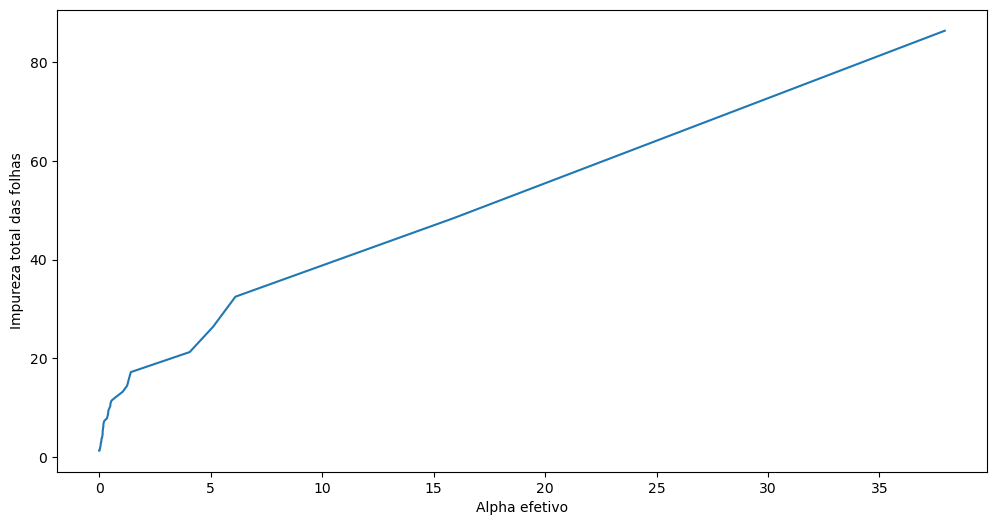

In [9]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(12,6))
plt.plot(ccp_alphas, impurities)

plt.xlabel(xlabel='Alpha efetivo')
plt.ylabel(ylabel='Impureza total das folhas')

plt.show()

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [10]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(ccp_alpha=ccp_alpha, random_state=2402)
    clf.fit(X_train, y_train)
    clfs.append(clf)

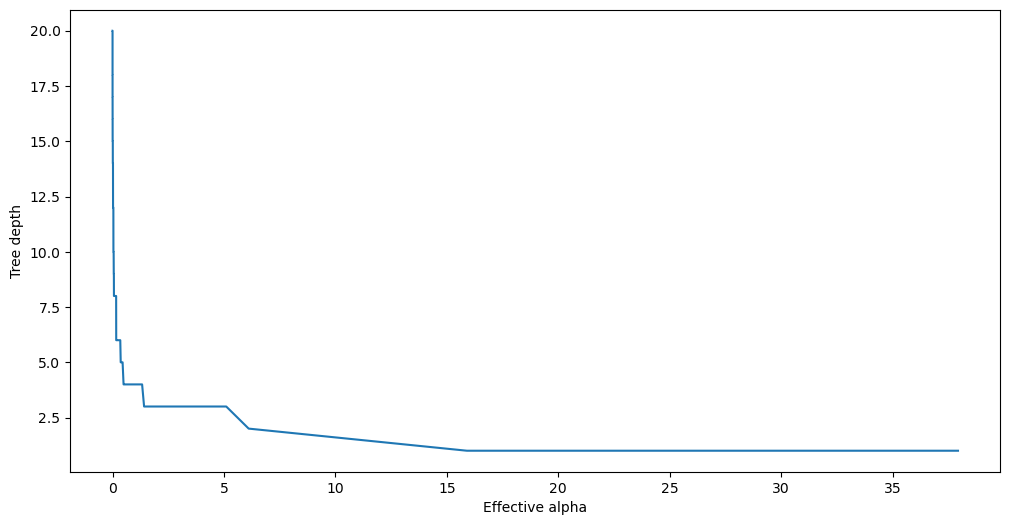

In [11]:
tree_depths = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=(12, 6))
plt.plot(ccp_alphas, tree_depths)

plt.xlabel(xlabel='Effective alpha')
plt.ylabel(ylabel='Tree depth')

plt.show()

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [12]:

train_scores = [mean_squared_error(y_true=y_train, 
                                   y_pred=clf.predict(X_train)) for clf in clfs]

test_scores  = [mean_squared_error(y_true=y_test, 
                                   y_pred=clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

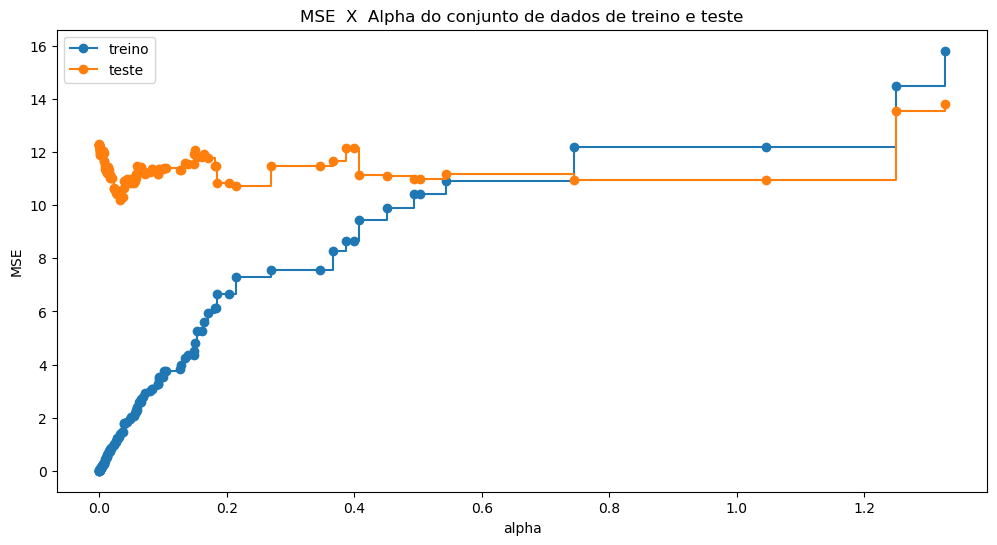

In [13]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlabel(xlabel='alpha')
ax.set_ylabel(ylabel='MSE')
ax.set_title(label='MSE  X  Alpha do conjunto de dados de treino e teste')

ax.plot(ccp_alphas[:-6], train_scores[:-6], 
        marker='o', label='treino', drawstyle='steps-post')

ax.plot(ccp_alphas[:-6], test_scores[:-6], 
        marker='o', label='teste', drawstyle='steps-post')

ax.legend()

plt.show()


In [14]:
df_ccp = pd.DataFrame(data={'ccp_alphas':ccp_alphas, 
                            'train_scores':train_scores, 
                            'test_scores':test_scores})

df_ccp.sort_values(by=['test_scores', 'train_scores'])

,ccp_alphas,train_scores,test_scores
52,0.031858,1.371828,10.204330
53,0.034917,1.474326,10.299736
54,0.036649,1.474326,10.299736
48,0.027525,1.190019,10.422042
49,0.028420,1.218439,10.422042
...,...,...,...
113,4.053518,21.288988,21.975284
114,5.100764,21.288988,21.975284
115,6.106994,32.496746,26.348237
116,15.897174,48.393921,42.982279


In [15]:
ccp_alpha_min = df_ccp.sort_values(by=['test_scores', 'train_scores']).iloc[0,0]
ccp_alpha_min

0.031857761669022516

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [16]:
final_tree = DecisionTreeRegressor(ccp_alpha=ccp_alpha_min, random_state=2402)
final_tree.fit(X_train, y_train)

print(f'Profundidade: {final_tree.tree_.max_depth}')
print(f'R-quadrado na base de testes: {final_tree.score(X_test, y_test):.2f}')
print(f'MSE na base de testes: {mean_squared_error(y_test, final_tree.predict(X_test)):.2f}')

Profundidade: 12
R-quadrado na base de testes: 0.87
MSE na base de testes: 10.20


### 7. Visualize esta árvore.

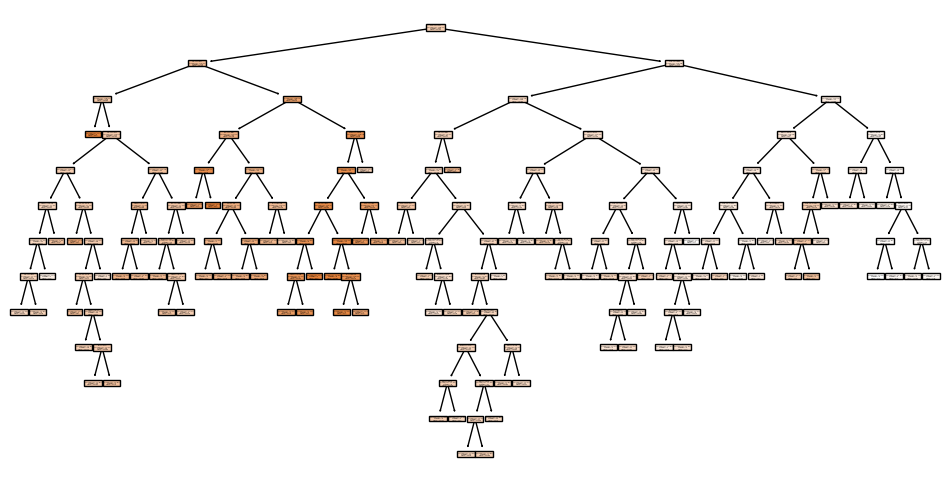

In [17]:
plt.rc('figure', figsize=(12, 6))

# Convertendo os nomes das colunas para uma lista
feature_names_list = X.columns.tolist()

tree.plot_tree(decision_tree=final_tree, 
               feature_names=feature_names_list, 
               filled=True);
